In [1]:
import pandas as pd

In [2]:
col_list = ['Make', 'Model', 'Year', 'Engine HP', 'Engine Cylinders', 'Transmission Type', 'Vehicle Style', 'highway MPG', 'city mpg', 'MSRP']

In [3]:
df = pd.read_csv("../data/2023W3.csv", usecols=col_list)

In [4]:
df.head()

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Vehicle Style,highway MPG,city mpg,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500


In [5]:
df.isna().sum()

Make                  0
Model                 0
Year                  0
Engine HP            69
Engine Cylinders     30
Transmission Type     0
Vehicle Style         0
highway MPG           0
city mpg              0
MSRP                  0
dtype: int64

In [6]:
df.columns

Index(['Make', 'Model', 'Year', 'Engine HP', 'Engine Cylinders',
       'Transmission Type', 'Vehicle Style', 'highway MPG', 'city mpg',
       'MSRP'],
      dtype='object')

In [7]:
df.columns = df.columns.str.replace(' ', '_').str.lower()

In [30]:
df['engine_hp'].fillna(0, inplace=True)
df['engine_cylinders'].fillna(0, inplace=True)

In [31]:
df.isna().sum()

make                 0
model                0
year                 0
engine_hp            0
engine_cylinders     0
transmission_type    0
vehicle_style        0
highway_mpg          0
city_mpg             0
price                0
above_average        0
dtype: int64

In [32]:
df.rename(columns={'msrp': 'price'}, inplace=True)

**Question 1**
- What is the most frequent observation (mode) for the column transmission_type?

**Answer is: `AUTOMATIC`**

In [33]:
df['transmission_type'].mode()

0    AUTOMATIC
Name: transmission_type, dtype: object

**Question 2**

- Create the correlation matrix for the numerical features of your dataset. In a correlation matrix, you compute the correlation coefficient between every pair of features in the dataset.

- What are the two features that have the biggest correlation in this dataset?

**Answer is: `highway_mpg and city_mpg`**

In [34]:
col_list = ['make', 'model', 'year', 'engine_hp', 'engine_cylinders', 'transmission_type', 'vehicle_style', 'highway_mpg', 'city_mpg', 'price']
num_col = ['year', 'engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'price']
cat_col = ['make', 'model', 'transmission_type', 'vehicle_style']

In [35]:
df[num_col].corr().T


,year,engine_hp,engine_cylinders,highway_mpg,city_mpg,price
year,1.000000,0.338714,-0.040708,0.258240,0.198171,0.227590
engine_hp,0.338714,1.000000,0.774851,-0.415707,-0.424918,0.650095
engine_cylinders,-0.040708,0.774851,1.000000,-0.614541,-0.587306,0.526274
highway_mpg,0.258240,-0.415707,-0.614541,1.000000,0.886829,-0.160043
city_mpg,0.198171,-0.424918,-0.587306,0.886829,1.000000,-0.157676
price,0.227590,0.650095,0.526274,-0.160043,-0.157676,1.000000


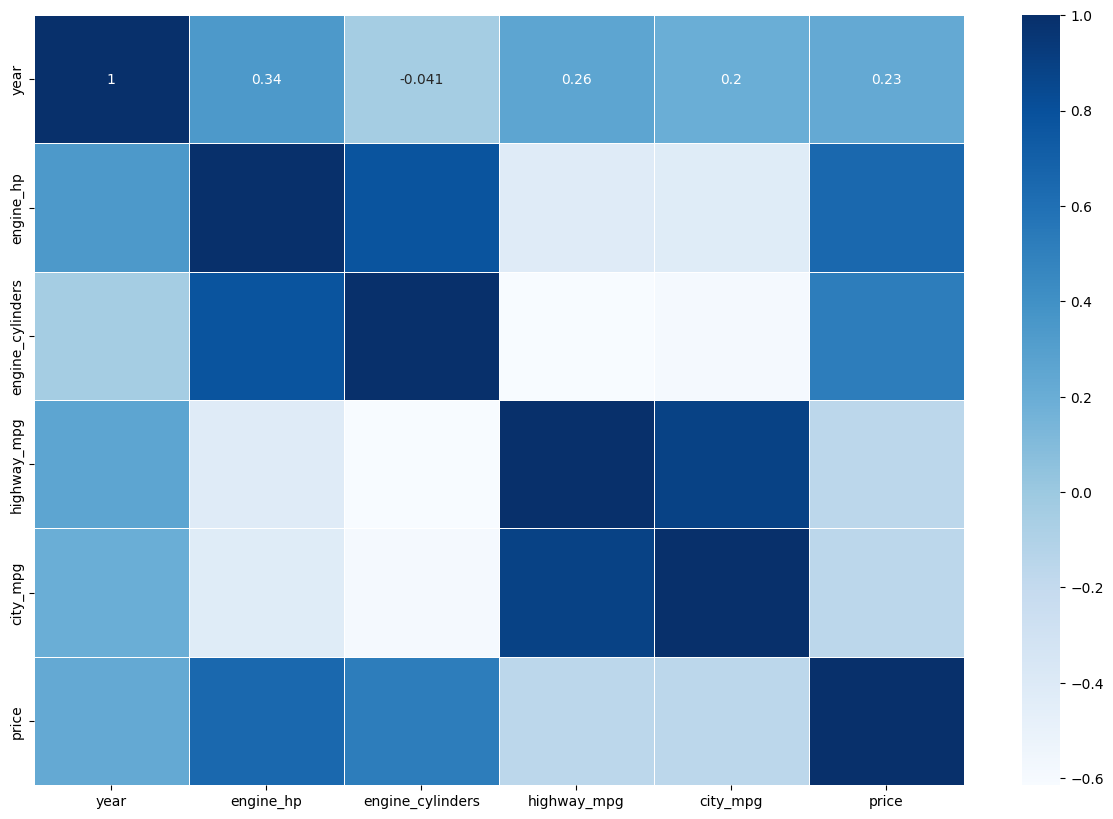

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize= (15, 10))
sns.heatmap(df[num_col].corr(), annot=True, linewidths=.5, cmap="Blues")
plt.show()

In [37]:
df[num_col].corr().unstack().sort_values(ascending=False)[:10]

year              year                1.000000
engine_hp         engine_hp           1.000000
city_mpg          city_mpg            1.000000
highway_mpg       highway_mpg         1.000000
engine_cylinders  engine_cylinders    1.000000
price             price               1.000000
city_mpg          highway_mpg         0.886829
highway_mpg       city_mpg            0.886829
engine_hp         engine_cylinders    0.774851
engine_cylinders  engine_hp           0.774851
dtype: float64

**Make price binary**
- Now we need to turn the price variable from numeric into a binary format.
- Let's create a variable **`above_average`** which is 1 if the price is above its mean value and 0 otherwise.

In [38]:
mean = df['price'].mean()
df['above_average'] = df['price'].apply(lambda x: 1 if x > mean else 0)

In [39]:
df['above_average'].value_counts()

above_average
0    8645
1    3269
Name: count, dtype: int64

In [40]:
# from sklearn.model_selection import train_test_split
X = df[['make', 'model', 'year', 'engine_hp', 'engine_cylinders', 'transmission_type', 'vehicle_style', 'highway_mpg', 'city_mpg', 'above_average']]
y = df[['price']]

In [41]:
from sklearn.model_selection import train_test_split

X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"X_train_full : {X_train_full.shape}, X_test : {X_test.shape}, y_train_full : {y_train_full.shape}, y_test: {y_test.shape}")

X_train_full : (9531, 10), X_test : (2383, 10), y_train_full : (9531, 1), y_test: (2383, 1)


In [42]:
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.25, random_state=42)
print(f"X_train : {X_train.shape}, X_val : {X_val.shape}, y_train : {y_train.shape}, y_val: {y_val.shape}")

X_train : (7148, 10), X_val : (2383, 10), y_train : (7148, 1), y_val: (2383, 1)


**Question 3**
- Calculate the mutual information score between above_average and other categorical variables in our dataset. Use the training set only.
- Round the scores to 2 decimals using round(score, 2).

**Answer is : `transmission_type `**

In [43]:
X_train.dtypes

make                  object
model                 object
year                   int64
engine_hp            float64
engine_cylinders     float64
transmission_type     object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
above_average          int64
dtype: object

In [44]:
from sklearn.metrics import mutual_info_score
# cat_list

def calculate_mi(series):
    return mutual_info_score(series, X_train.above_average)

mi = X_train[cat_col].apply(calculate_mi)
# mi = mi.sort_values(assending=False, )

In [45]:
mi = round(mi.sort_values(ascending=False), 2)
mi

model                0.46
make                 0.24
vehicle_style        0.08
transmission_type    0.02
dtype: float64

**Question 4**
- Now let's train a logistic regression.
- Remember that we have several categorical variables in the dataset. Include them using one-hot encoding.
- Fit the model on the training dataset.
    - To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters:
    - model = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)
- Calculate the accuracy on the validation dataset and round it to 2 decimal digits.

**One Hot Encoding using dictvectorizer**

In [54]:
y_train = X_train['above_average']

In [56]:
del X_train['above_average']

In [57]:
y_val = X_val['above_average']
del X_val['above_average']

In [61]:
X_train

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg
3972,Mitsubishi,Endeavor,2011,225.0,6.0,AUTOMATIC,4dr SUV,19,15
1997,Kia,Borrego,2009,276.0,6.0,AUTOMATIC,4dr SUV,21,17
5216,Lamborghini,Gallardo,2012,570.0,10.0,MANUAL,Convertible,20,12
2805,Chevrolet,Colorado,2016,200.0,4.0,AUTOMATIC,Crew Cab Pickup,27,20
11369,Pontiac,Vibe,2009,158.0,4.0,AUTOMATIC,4dr Hatchback,26,20
...,...,...,...,...,...,...,...,...,...
9232,Toyota,Sienna,2016,266.0,6.0,AUTOMATIC,Passenger Minivan,25,18
5710,Chevrolet,HHR,2009,260.0,4.0,MANUAL,Wagon,29,21
11306,Hyundai,Veracruz,2012,260.0,6.0,AUTOMATIC,4dr SUV,22,17
4414,Mitsubishi,Expo,1993,136.0,4.0,MANUAL,2dr Hatchback,26,19


In [60]:
from sklearn.feature_extraction import DictVectorizer
train_dict = X_train.to_dict(orient='records')
val_dict = X_val.to_dict(orient='records')
dv = DictVectorizer(sparse=False)
dv.fit(train_dict)

oh_X_train = dv.transform(train_dict)
oh_X_val = dv.transform(val_dict)

In [59]:
oh_X_val[:0]

array([], shape=(0, 943), dtype=float64)

In [62]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)

In [63]:
model.fit(oh_X_train, y_train)

LogisticRegression(C=10, max_iter=1000, random_state=42, solver='liblinear')

In [64]:
y_val_pred = model.predict(oh_X_val)

In [65]:
from sklearn.metrics import accuracy_score
import numpy as np
acc = np.round(accuracy_score(y_val, y_val_pred), 2)
acc

0.95

In [66]:
acc = np.round(accuracy_score(y_val, y_val_pred), 2)
acc

0.95

**Answer is 0.95**

**Question 5**
- Let's find the least useful feature using the feature elimination technique.
- Train a model with all these features (using the same parameters as in Q4).
- Now exclude each feature from this set and train a model without it. Record the accuracy for each model.
- For each feature, calculate the difference between the original accuracy and the accuracy without the feature.

In [78]:
cat_feature = list(X_train.columns[X_train.dtypes == 'object'])
num_feature = list(X_train.columns[X_train.dtypes != 'object'])

print(f"cat_fe : {cat_feature}")
print(f"num_fe : {num_feature}")

cat_fe : ['make', 'model', 'transmission_type', 'vehicle_style']
num_fe : ['year', 'engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg']


In [81]:
features = cat_feature + num_feature

In [82]:
def create_dict(data, col_list):
    return data[col_list].to_dict(orient= 'records')

In [86]:
X_train

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg
3972,Mitsubishi,Endeavor,2011,225.0,6.0,AUTOMATIC,4dr SUV,19,15
1997,Kia,Borrego,2009,276.0,6.0,AUTOMATIC,4dr SUV,21,17
5216,Lamborghini,Gallardo,2012,570.0,10.0,MANUAL,Convertible,20,12
2805,Chevrolet,Colorado,2016,200.0,4.0,AUTOMATIC,Crew Cab Pickup,27,20
11369,Pontiac,Vibe,2009,158.0,4.0,AUTOMATIC,4dr Hatchback,26,20
...,...,...,...,...,...,...,...,...,...
9232,Toyota,Sienna,2016,266.0,6.0,AUTOMATIC,Passenger Minivan,25,18
5710,Chevrolet,HHR,2009,260.0,4.0,MANUAL,Wagon,29,21
11306,Hyundai,Veracruz,2012,260.0,6.0,AUTOMATIC,4dr SUV,22,17
4414,Mitsubishi,Expo,1993,136.0,4.0,MANUAL,2dr Hatchback,26,19


In [85]:
X_train.isnull().sum()

make                 0
model                0
year                 0
engine_hp            0
engine_cylinders     0
transmission_type    0
vehicle_style        0
highway_mpg          0
city_mpg             0
dtype: int64

In [95]:
orig_acc = acc
list_score = 0
model = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)

for feature in features:
    subset = features.copy()
    subset.remove(feature)
    # print(subset)

    train_dict = create_dict(X_train, subset)
    val_dict = create_dict(X_val, subset)

    dv = DictVectorizer(sparse= False)

    dv.fit(train_dict)

    d_X_train = dv.transform(train_dict)
    d_X_val = dv.transform(val_dict)


    model.fit(d_X_train, y_train)

    y_pred = model.predict(d_X_val)

    score = accuracy_score(y_val, y_pred)

    print(orig_acc - score)
    print(f"Column Heading : {feature} , OrigScore - score {round((orig_acc - score), 4)}, Score : {score}")

    # if list_score < (orig_acc - score):
    #     list_score = orig_acc - score
    #     print(list_score)



0.004133445237096023
Column Heading : make , OrigScore - score 0.0041, Score : 0.9458665547629039
0.025954678976080503
Column Heading : model , OrigScore - score 0.026, Score : 0.9240453210239195
0.010428031892572354
Column Heading : transmission_type , OrigScore - score 0.0104, Score : 0.9395719681074276
0.0062316407889214664
Column Heading : vehicle_style , OrigScore - score 0.0062, Score : 0.9437683592110785
0.0024548887956357124
Column Heading : year , OrigScore - score 0.0025, Score : 0.9475451112043642
0.026374318086445636
Column Heading : engine_hp , OrigScore - score 0.0264, Score : 0.9236256819135543
0.0028745279060008455
Column Heading : engine_cylinders , OrigScore - score 0.0029, Score : 0.9471254720939991
0.0032941670163658676
Column Heading : highway_mpg , OrigScore - score 0.0033, Score : 0.9467058329836341
0.01756189676877884
Column Heading : city_mpg , OrigScore - score 0.0176, Score : 0.9324381032312211


**Answer of Question is `Year`**

**Question 6**
- For this question, we'll see how to use a linear regression model from Scikit-Learn.
- We'll need to use the original column price. Apply the logarithmic transformation to this column.
- Fit the Ridge regression model on the training data with a solver 'sag'. Set the seed to 42.
- This model also has a parameter alpha. Let's try the following values: [0, 0.01, 0.1, 1, 10].
- Round your RMSE scores to 3 decimal digits.<br>
Which of these alphas leads to the best RMSE on the validation set?

In [96]:
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"X_train_full : {X_train_full.shape}, X_test : {X_test.shape}, y_train_full : {y_train_full.shape}, y_test: {y_test.shape}")


X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.25, random_state=42)
print(f"X_train : {X_train.shape}, X_val : {X_val.shape}, y_train : {y_train.shape}, y_val: {y_val.shape}")

X_train_full : (9531, 10), X_test : (2383, 10), y_train_full : (9531, 1), y_test: (2383, 1)
X_train : (7148, 10), X_val : (2383, 10), y_train : (7148, 1), y_val: (2383, 1)


In [100]:
del X_train['above_average']
del X_val['above_average']
del X_test['above_average']

In [98]:
y_train

,price
3972,33599
1997,26245
5216,248000
2805,24990
11369,20475
...,...
9232,37655
5710,25135
11306,28345
4414,2000


In [101]:
y_train = np.log1p(y_train)
y_val = np.log1p(y_val)
y_test = np.log1p(y_test)

In [115]:
from sklearn.metrics import mean_squared_error

def rmse(y, y_pred) :
     acc = mean_squared_error(y, y_pred)
     rmse_score = np.sqrt(acc)
     rmse_score = round(rmse_score, 3)
     return rmse_score
    

In [116]:
rmse([0.9], [0.95])

0.05

In [105]:
train_dict = X_train.to_dict(orient='records')
val_dict = X_val.to_dict(orient='records')
dv = DictVectorizer(sparse=False)
dv.fit(train_dict)

oh_X_train = dv.transform(train_dict)
oh_X_val = dv.transform(val_dict)

In [ ]:
for alpha in [0, 0.01, 0.1, 1, 10]:
    print(alpha)
    

In [117]:
from sklearn.linear_model import Ridge
rmse_list = []
for alpha in [0]:
    model = Ridge(alpha=alpha, solver='sag' ,random_state=42)
    model.fit(oh_X_train, y_train)

    y_pred = model.predict(oh_X_val)
    rmse_score = rmse(y_val, y_pred)
    print(rmse_score)
    rmse_list.append(rmse_score)

print(rmse_list)




0.487
[0.487]


C:\Users\LENOVO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [118]:
for alpha in [0.01, 0.1, 1, 10]:
    model = Ridge(alpha=alpha, solver='sag' ,random_state=42)
    model.fit(oh_X_train, y_train)

    y_pred = model.predict(oh_X_val)
    rmse_score = rmse(y_val, y_pred)
    print(rmse_score)
    rmse_list.append(rmse_score)

print(rmse_list)

C:\Users\LENOVO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


0.487


C:\Users\LENOVO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


0.487


C:\Users\LENOVO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


0.487
0.487
[0.487, 0.487, 0.487, 0.487, 0.487]


C:\Users\LENOVO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


**Answer is `10`**